In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from scipy.fft import rfft, irfft, rfftfreq

%matplotlib inline

sns.set(style="darkgrid")

In [4]:
data_ruo    = pd.read_excel("RUONIA.xlsx")
data_ruo = data_ruo[["DT", "ruo"]]
data_ruo["DT"] = pd.to_datetime(data_ruo["DT"])
data_ruo = data_ruo.iloc[::-1]
data_ruo = data_ruo.reset_index(drop=True)


data_sse50  = pd.read_csv("sse50.csv")
def convert_to_float(value):
    if isinstance(value, str):  # Если значение строка
        value = value.replace(',', '')  # Удаляем запятые
        if 'B' in value:  # Обработка миллиардов
            return float(value.replace('B', '')) * 1e9
        elif 'M' in value:  # Обработка миллионов
            return float(value.replace('M', '')) * 1e6
        elif '%' in value:  # Обработка процентов
            return float(value.replace('%', '')) / 100
        else:
            return float(value)  # Просто преобразуем в float
    return float(value)  # Если значение уже числовое

# data_sse50 = data_sse50[::-1]
data_sse50[["Price"]] = data_sse50[["Price"]].applymap(convert_to_float)
data_sse50["Date"] = pd.to_datetime(data_sse50["Date"])
data_sse50 = data_sse50[["Price", "Date"]]
data_sse50 = data_sse50[::-1]
data_sse50 = data_sse50.reset_index(drop=True)

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\styles\stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
C:\Users\user\AppData\Local\Temp\ipykernel_28324\1235617133.py:23: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_sse50[["Price"]] = data_sse50[["Price"]].applymap(convert_to_float)


C:\Users\user\AppData\Local\Temp\ipykernel_28324\4167246728.py:23: RuntimeWarning: divide by zero encountered in divide
  h_t = np.exp(1j * theta / 365 * t) / (2 * np.pi * 1j * t) + dirac
C:\Users\user\AppData\Local\Temp\ipykernel_28324\4167246728.py:23: RuntimeWarning: invalid value encountered in divide
  h_t = np.exp(1j * theta / 365 * t) / (2 * np.pi * 1j * t) + dirac
C:\Users\user\AppData\Local\Temp\ipykernel_28324\4167246728.py:24: RuntimeWarning: invalid value encountered in multiply
  manual_result = f_t + f_t * h_t


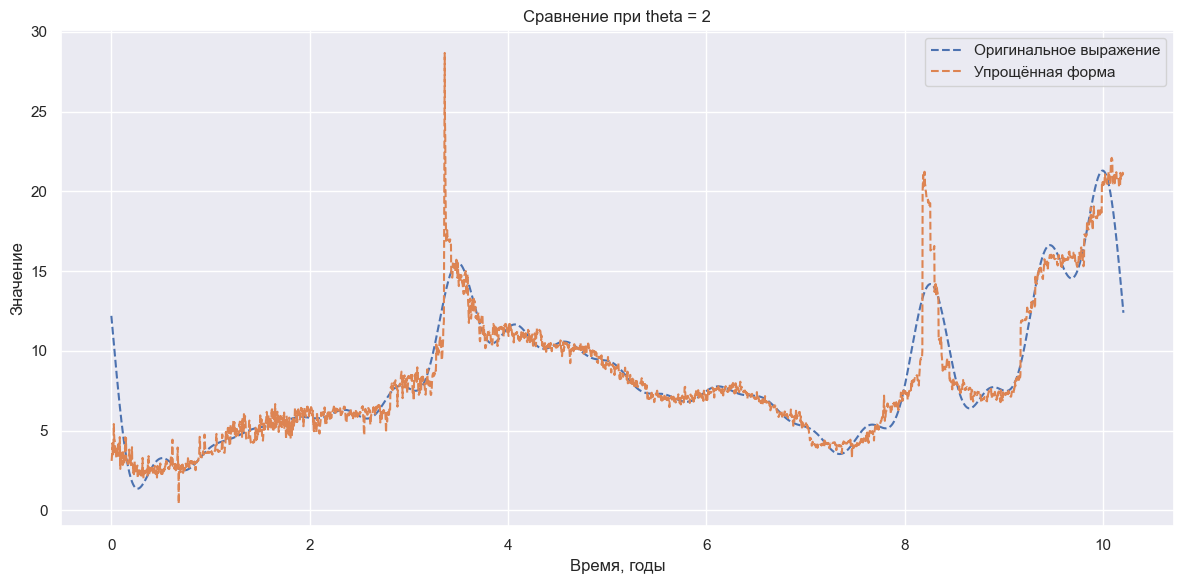

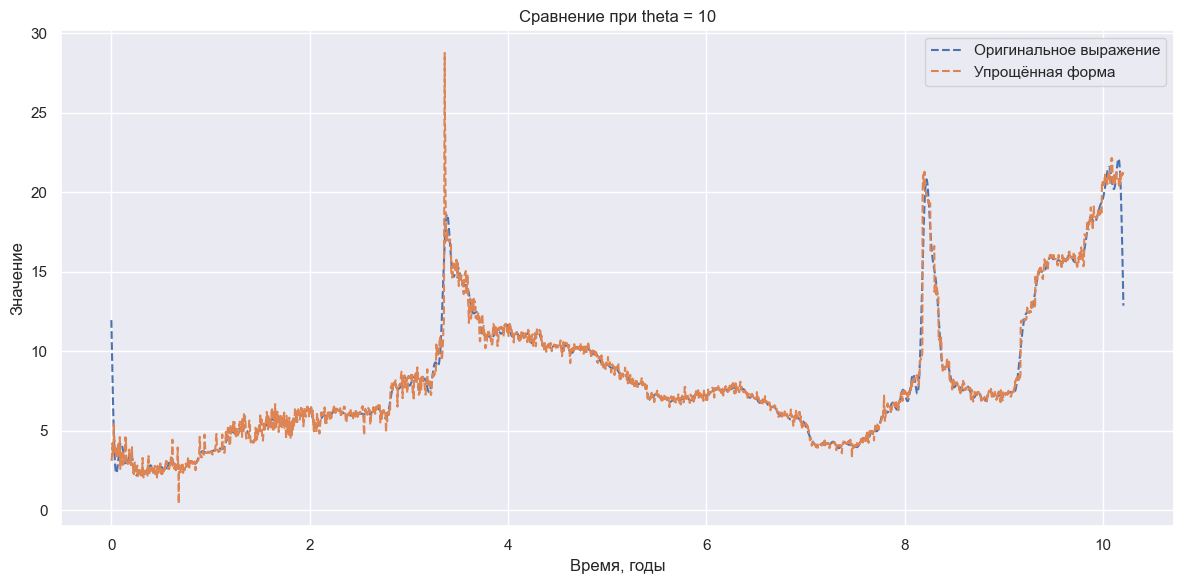

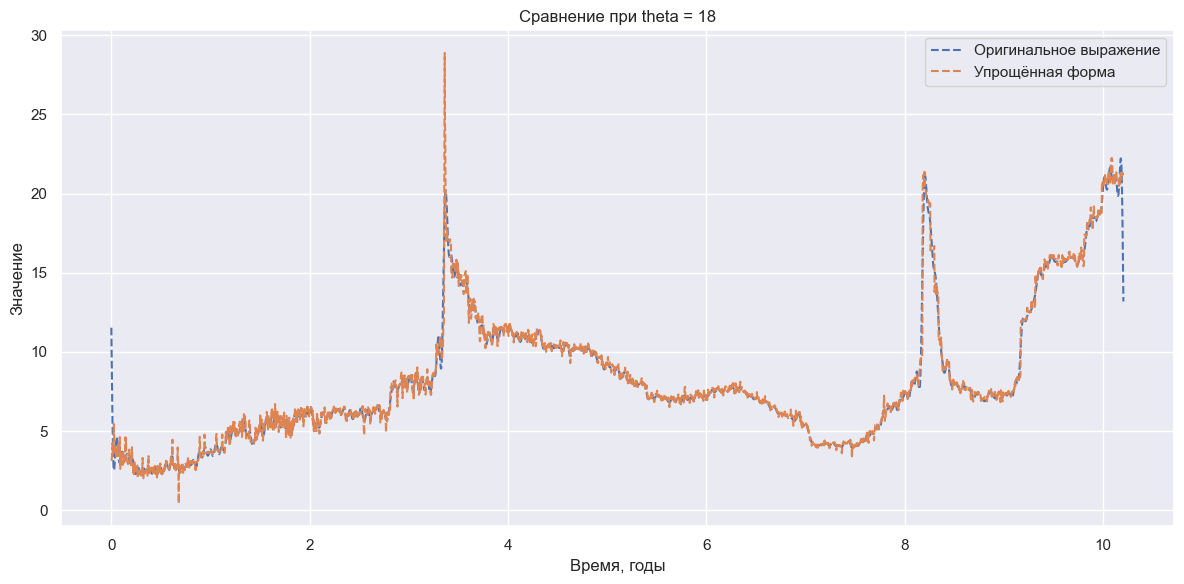

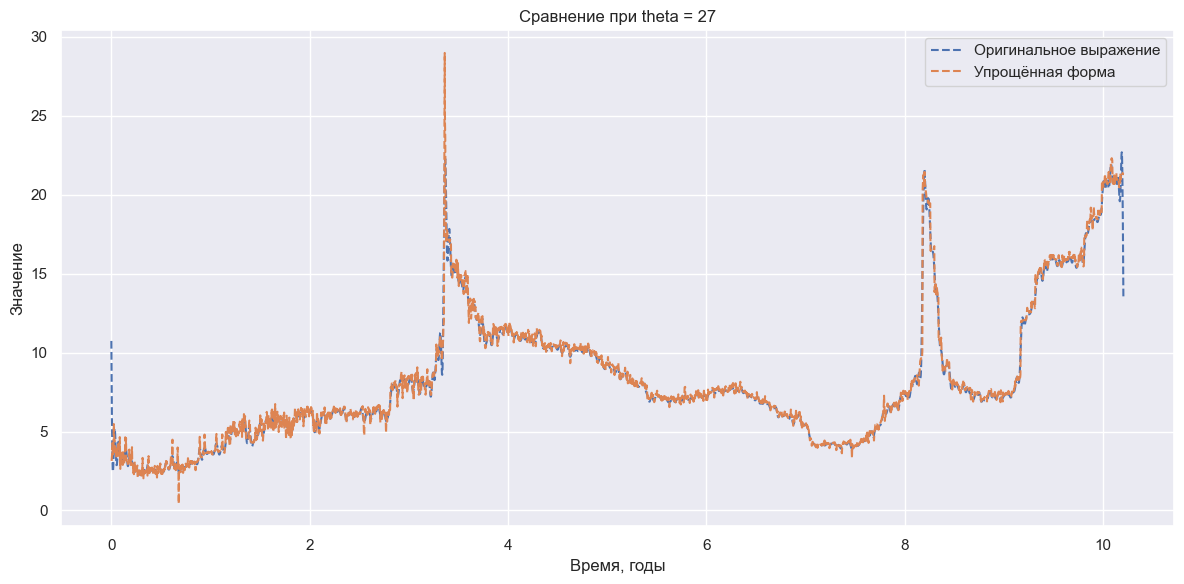

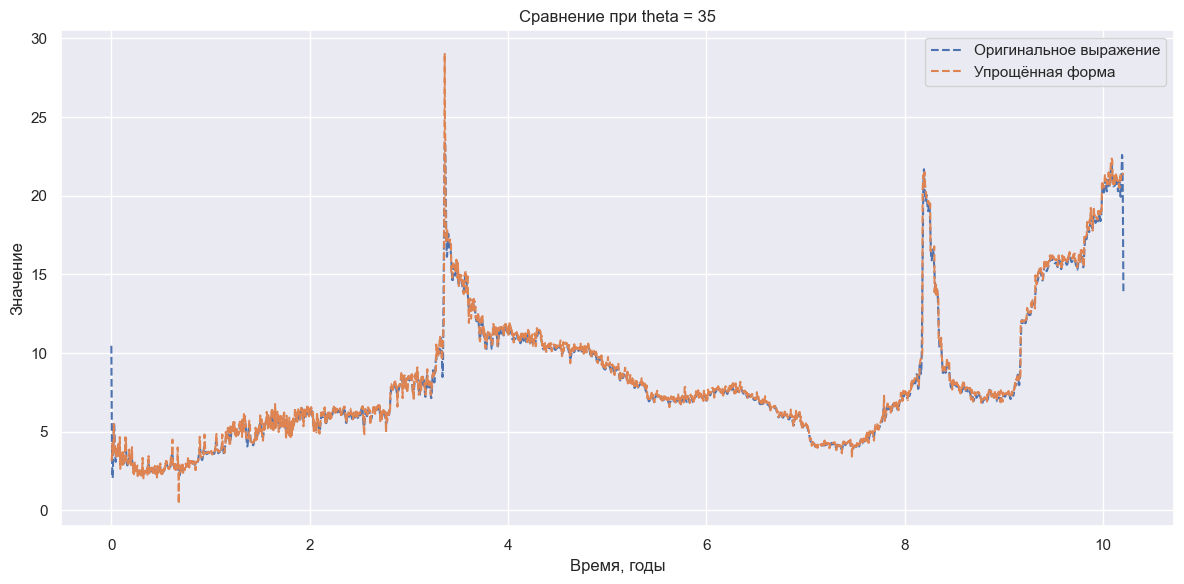

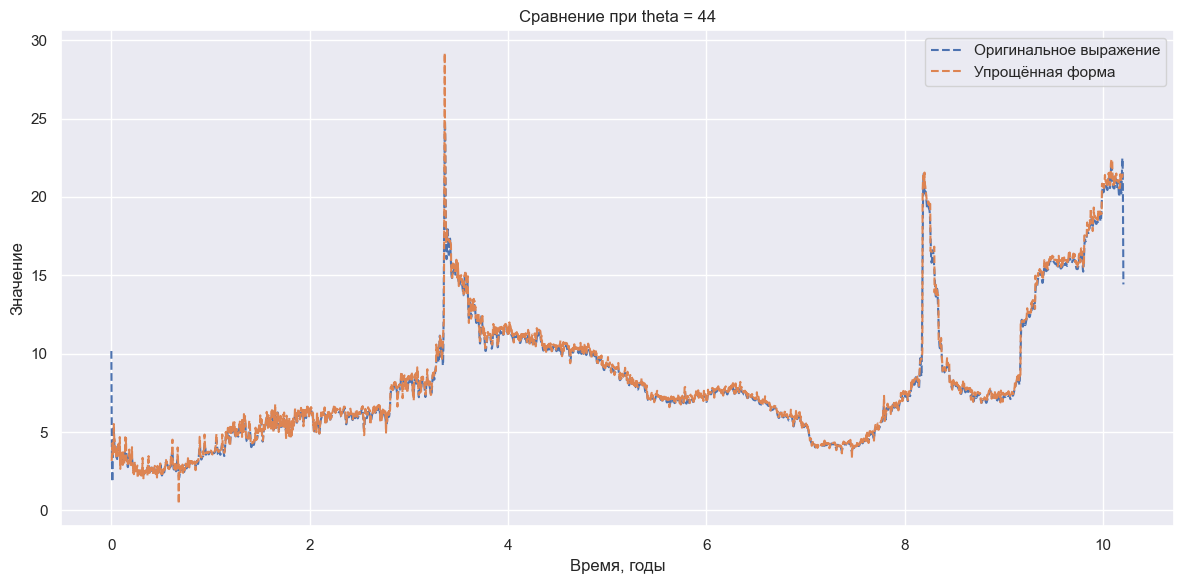

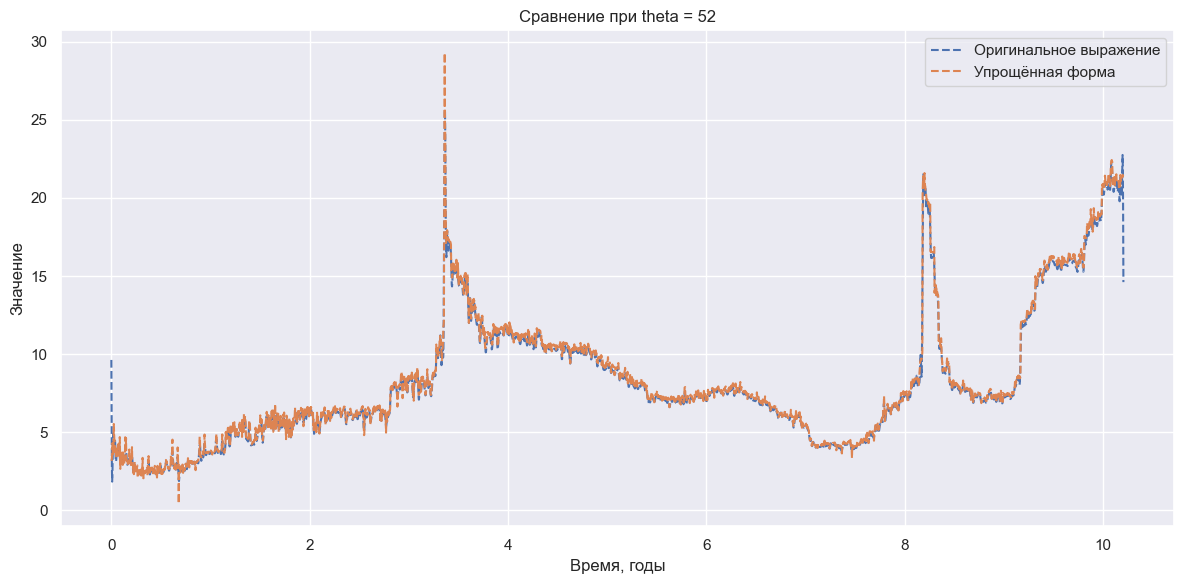

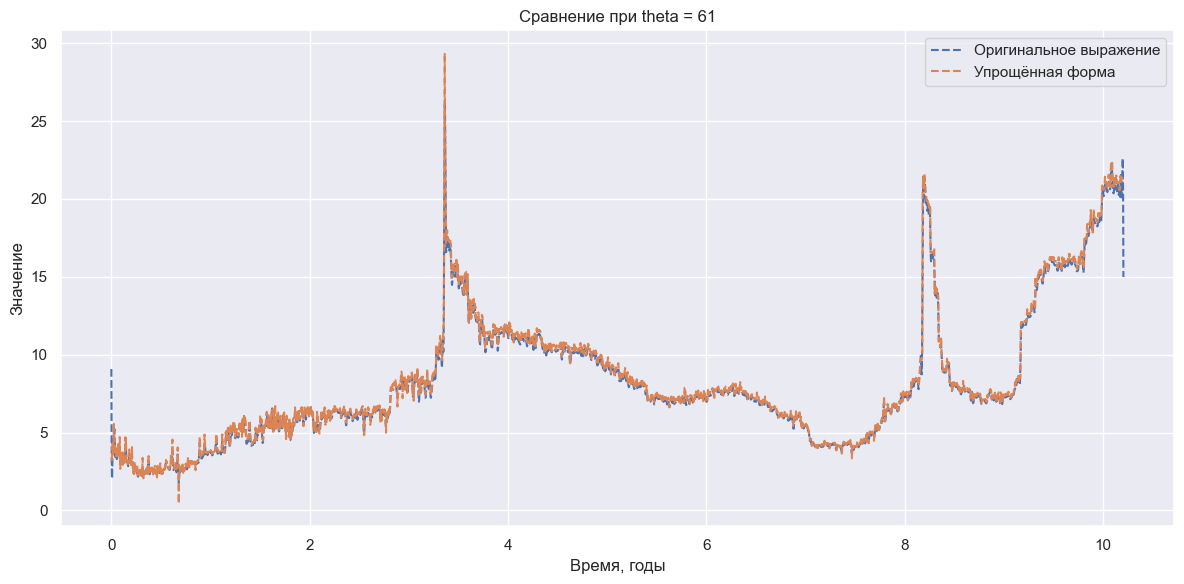

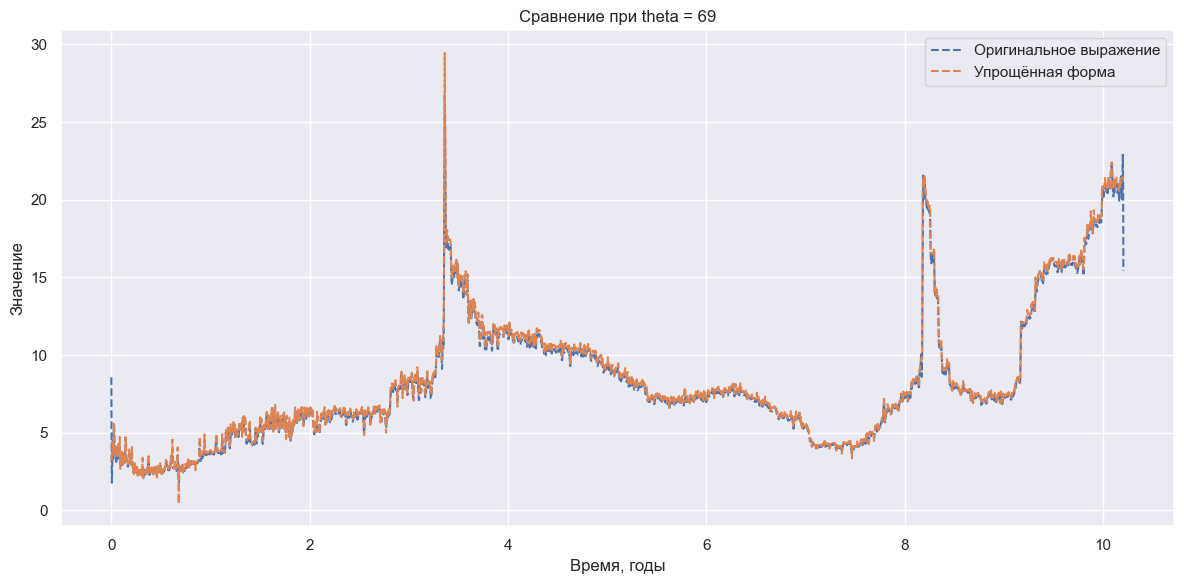

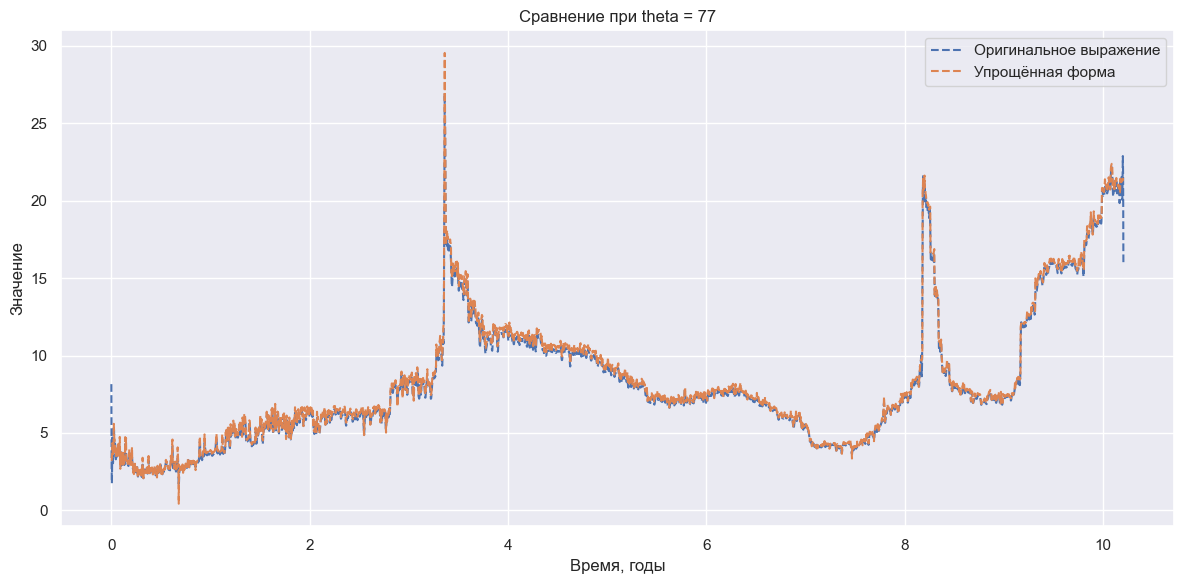

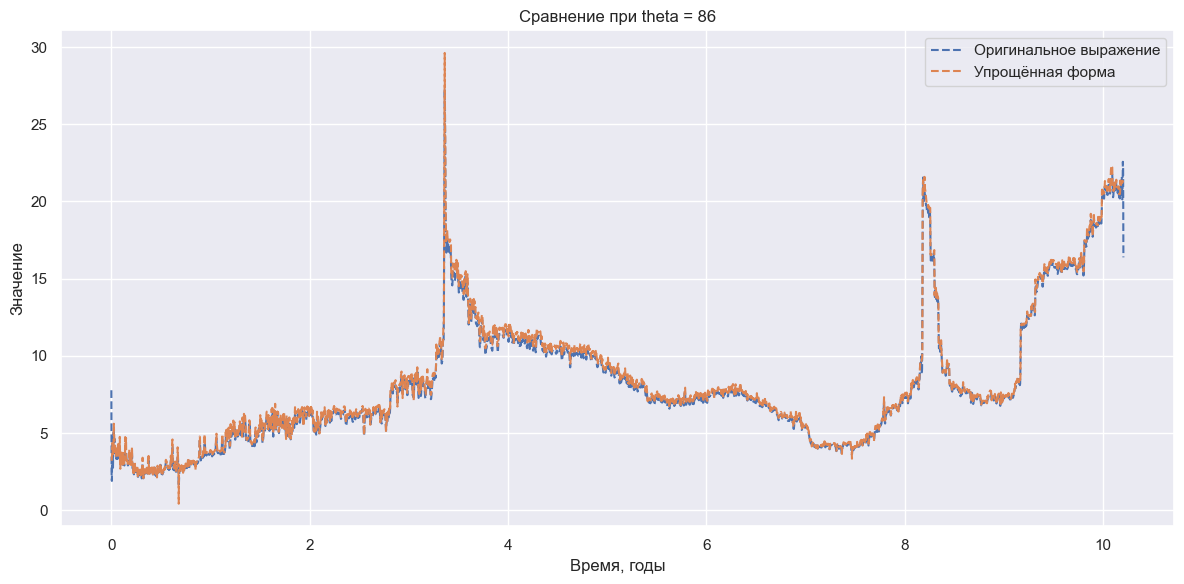

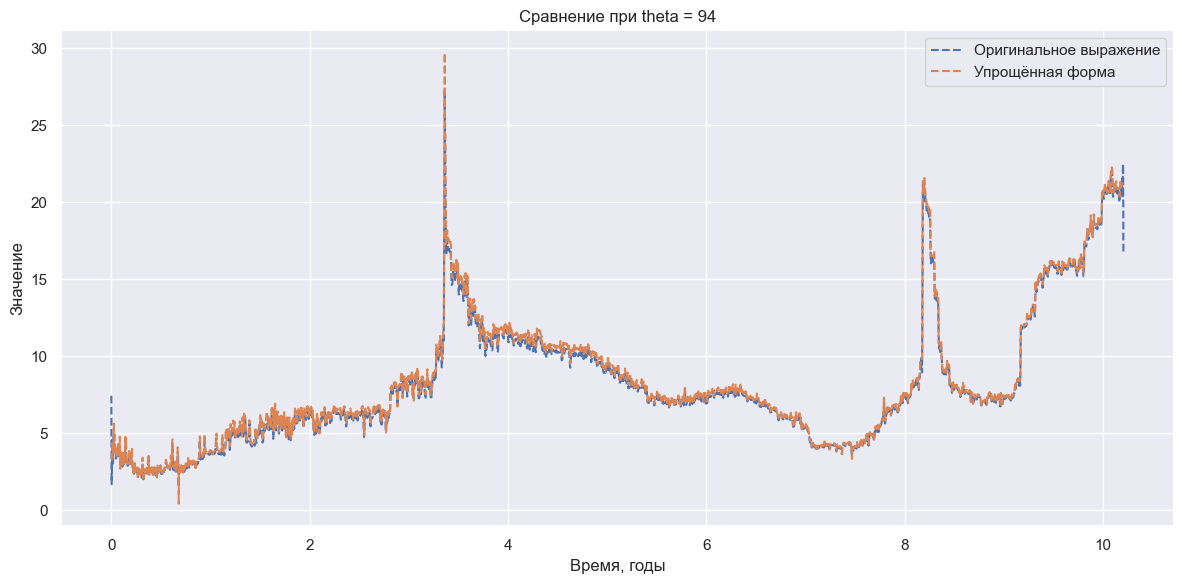

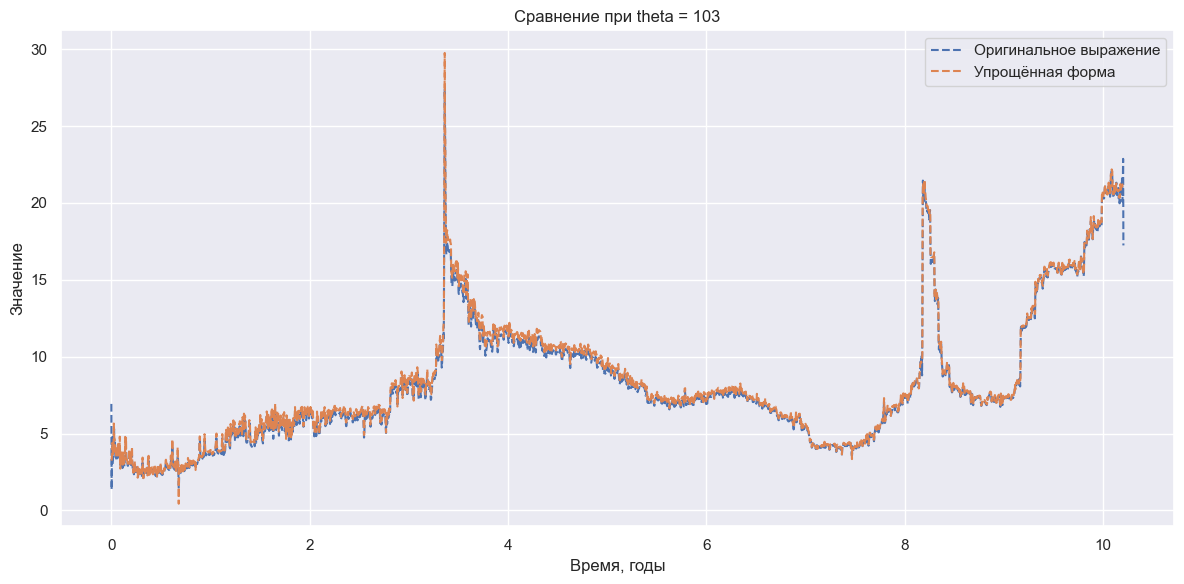

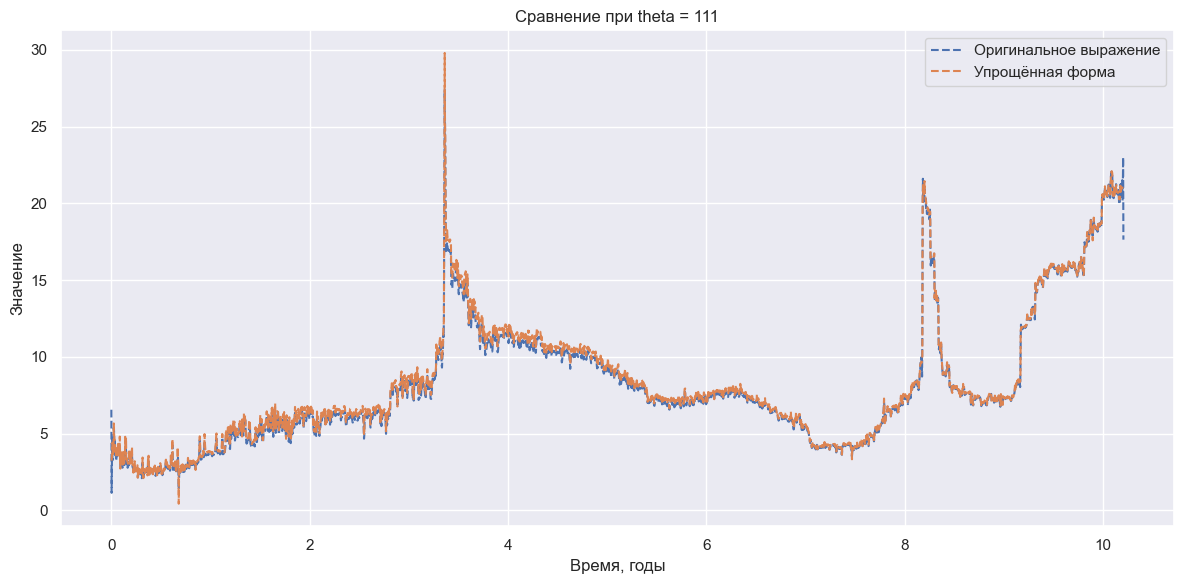

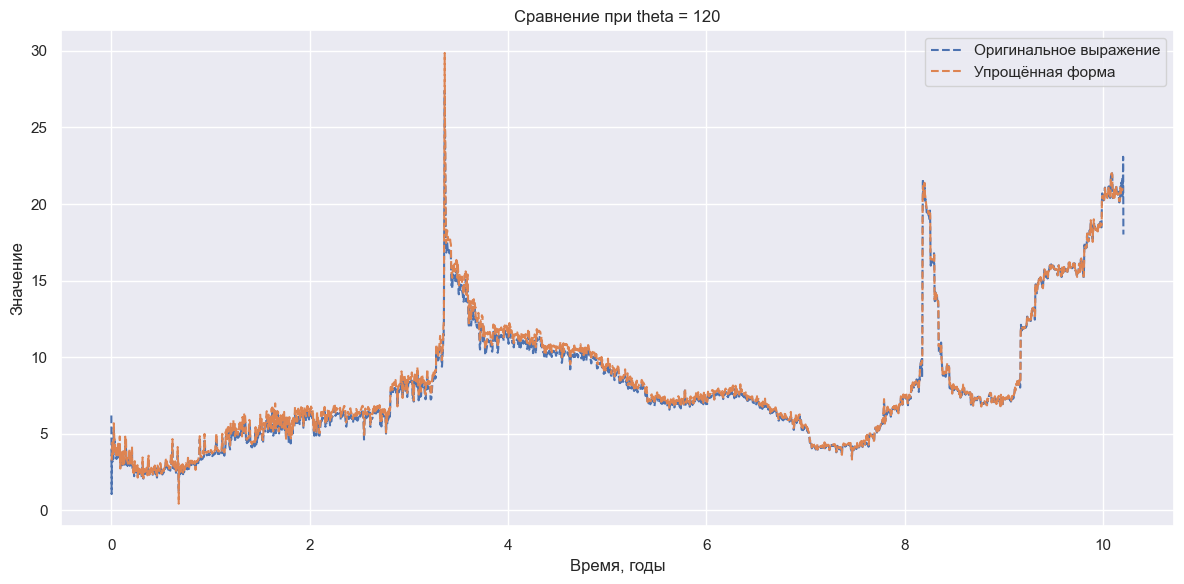

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, irfft, rfftfreq

# Предполагается, что data_ruo уже загружен и содержит колонку 'ruo'
# Например: import pandas as pd; data_ruo = pd.read_csv("data.csv")

# 1. Временной сигнал
f_t = data_ruo['ruo'].values[:-1]
t = np.arange(0, len(f_t)/365, 1/365)

# 2. Функция обратного Фурье с обнулением частот выше theta
def Inv_F(theta):
    yf = rfft(f_t)
    xf = rfftfreq(len(f_t), 1/365)
    yf[xf > theta] = 0
    return irfft(yf)

# 3. Упрощённая формула с h(t)
def Inv_F_2(theta):
    dirac = np.zeros_like(t)
    dirac[0] = 100000  # приближение дельта-функции
    h_t = np.exp(1j * theta / 365 * t) / (2 * np.pi * 1j * t) + dirac
    manual_result = f_t + f_t * h_t
    return manual_result

# 4. Список theta для построения
thetas = np.linspace(2, 120, 15, dtype=int)  # 10 значений от 5 до 50

# 5. Построение 10 отдельных графиков
for theta in thetas:
    plt.figure(figsize=(12, 6))
    plt.plot(t, Inv_F(theta), '--', label='Оригинальное выражение')
    plt.plot(t, np.real(Inv_F_2(theta)), '--', label='Упрощённая форма')
    plt.title(f'Сравнение при theta = {theta}')
    plt.xlabel('Время, годы')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_28324\3765583752.py:23: RuntimeWarning: divide by zero encountered in divide
  h_t = np.exp(1j * theta / 365 * t) / (2 * np.pi * 1j * t) + dirac
C:\Users\user\AppData\Local\Temp\ipykernel_28324\3765583752.py:23: RuntimeWarning: invalid value encountered in divide
  h_t = np.exp(1j * theta / 365 * t) / (2 * np.pi * 1j * t) + dirac
C:\Users\user\AppData\Local\Temp\ipykernel_28324\3765583752.py:24: RuntimeWarning: invalid value encountered in multiply
  manual_result = f_t + f_t * h_t


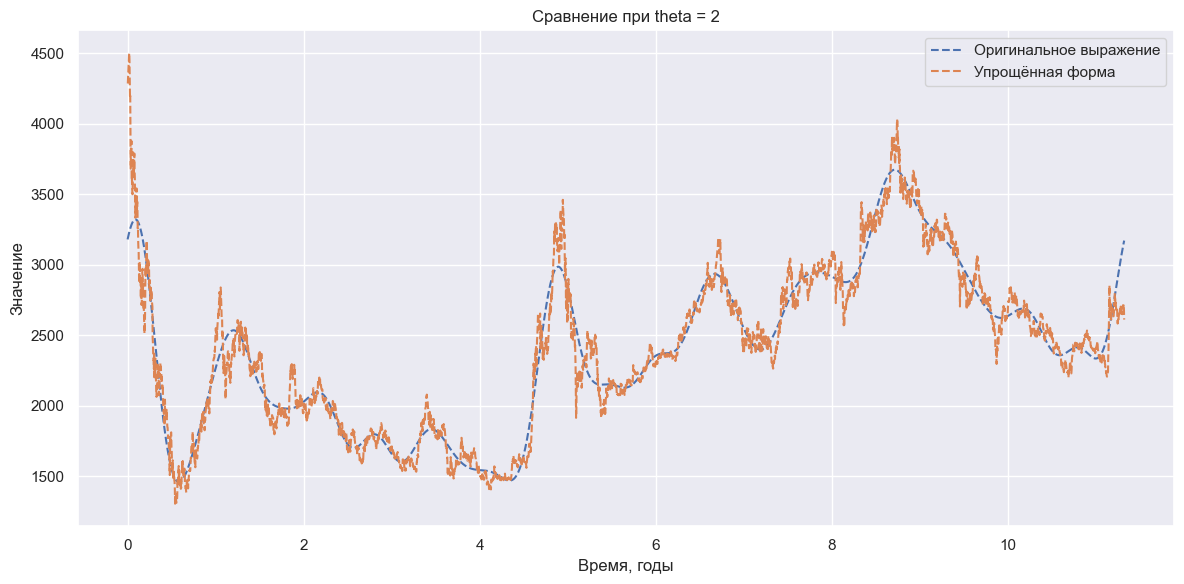

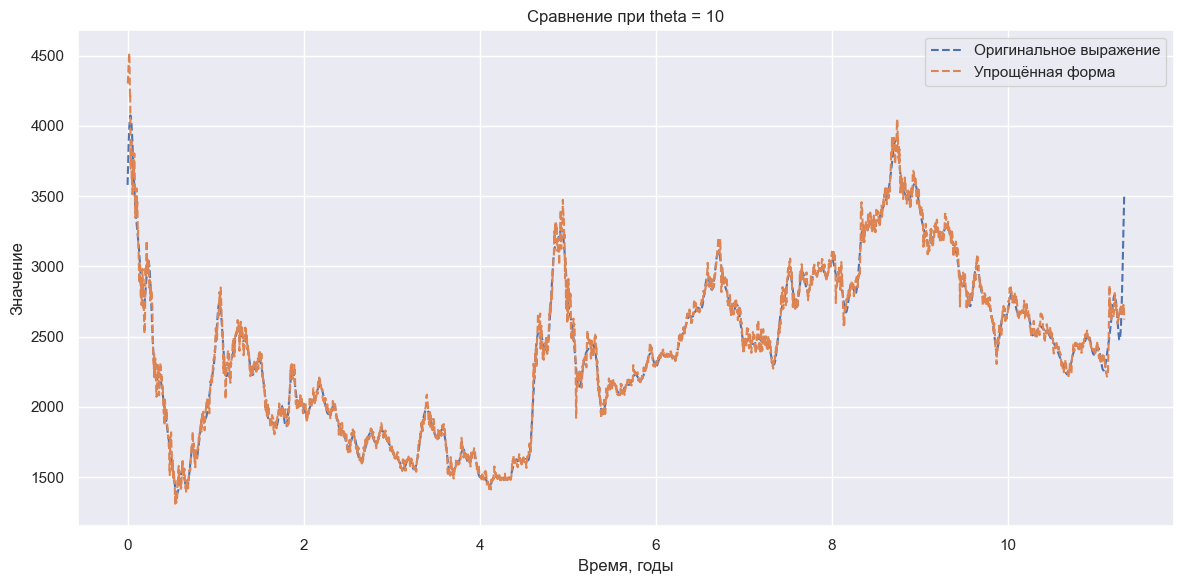

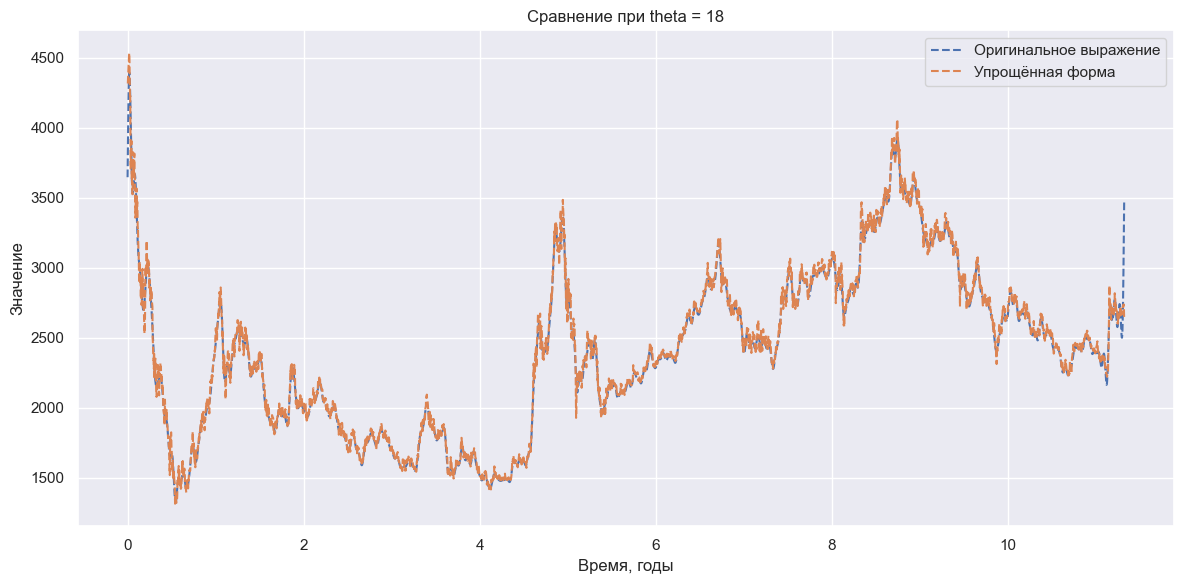

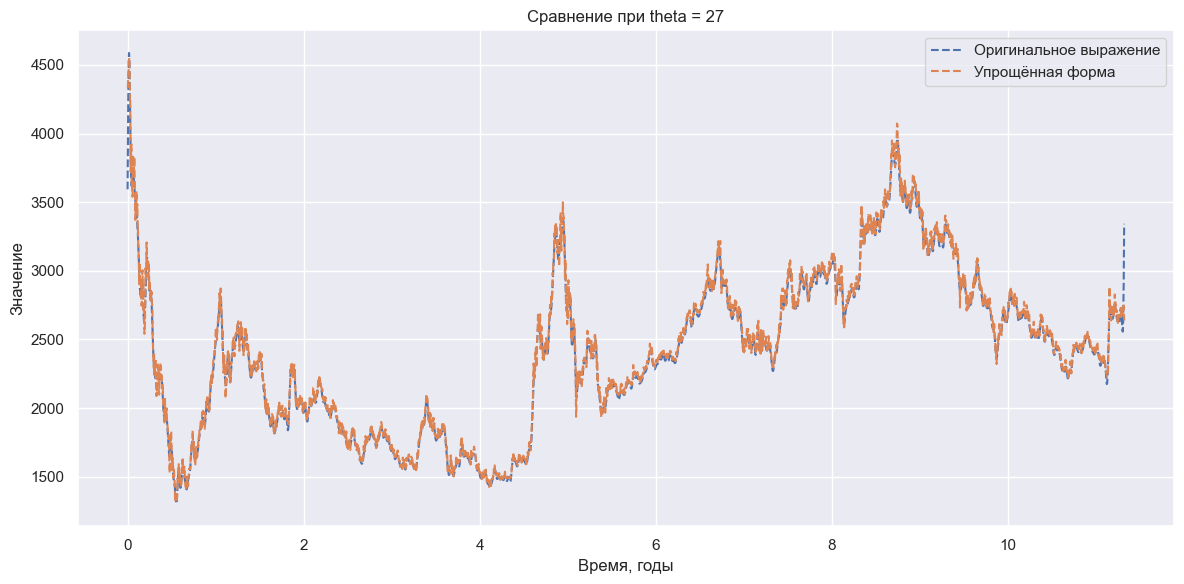

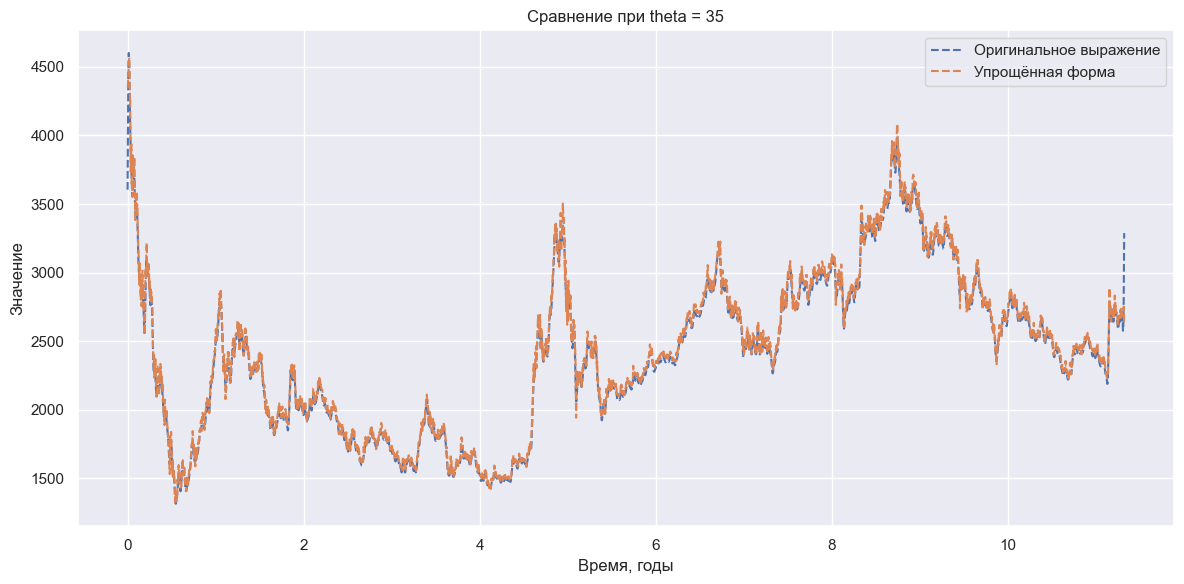

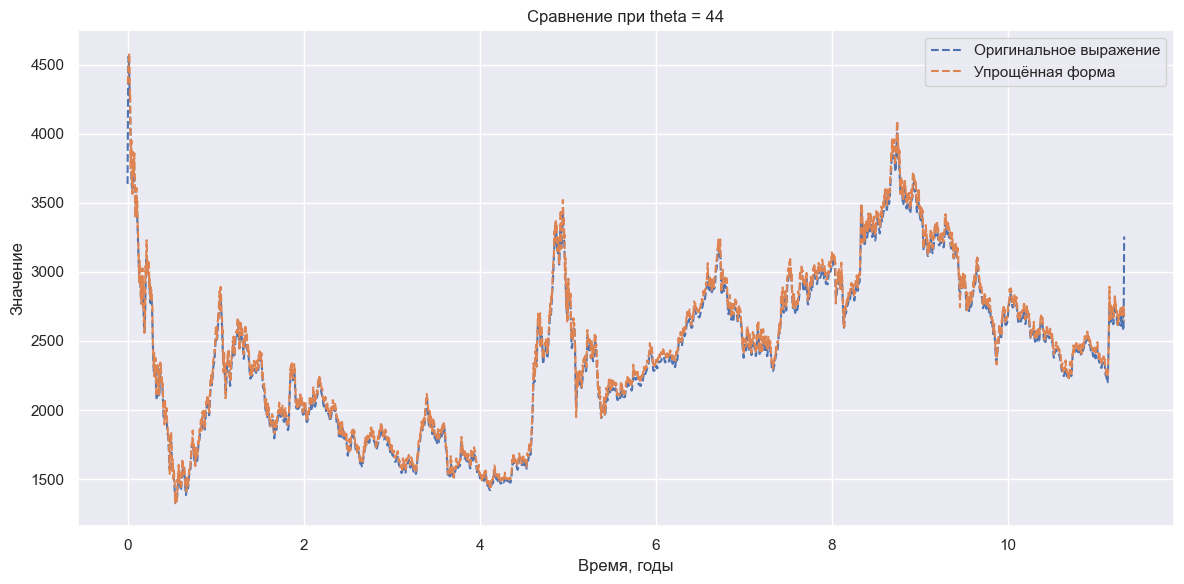

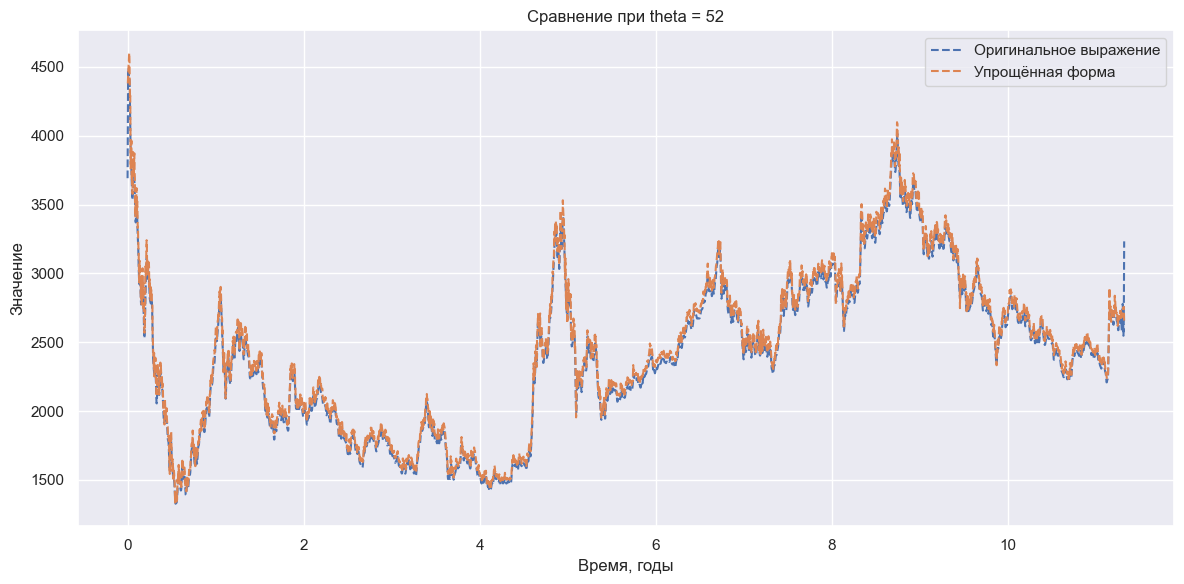

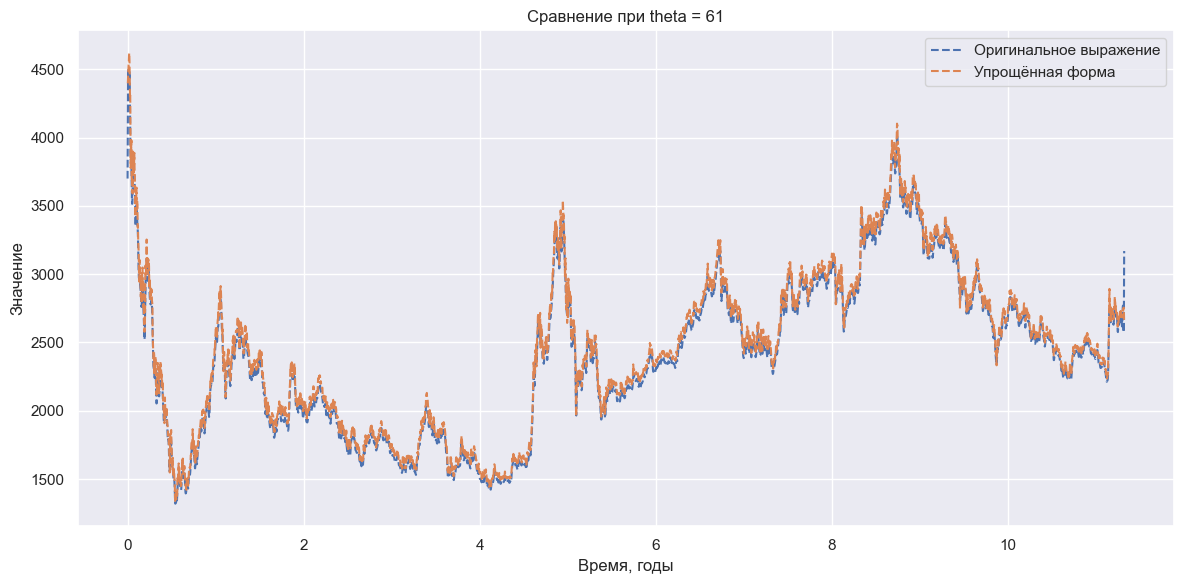

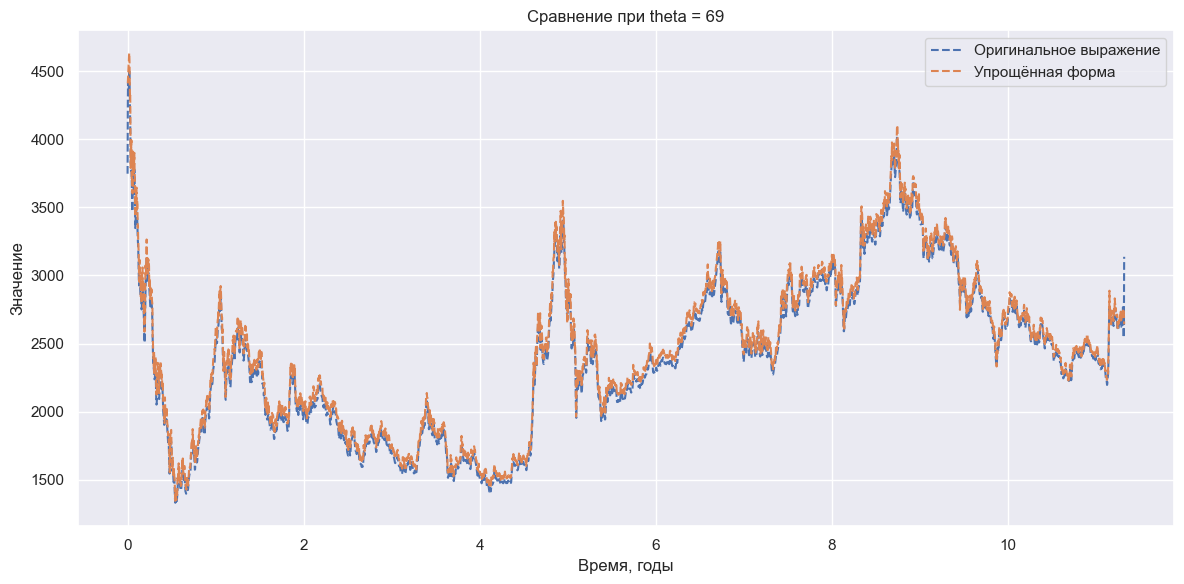

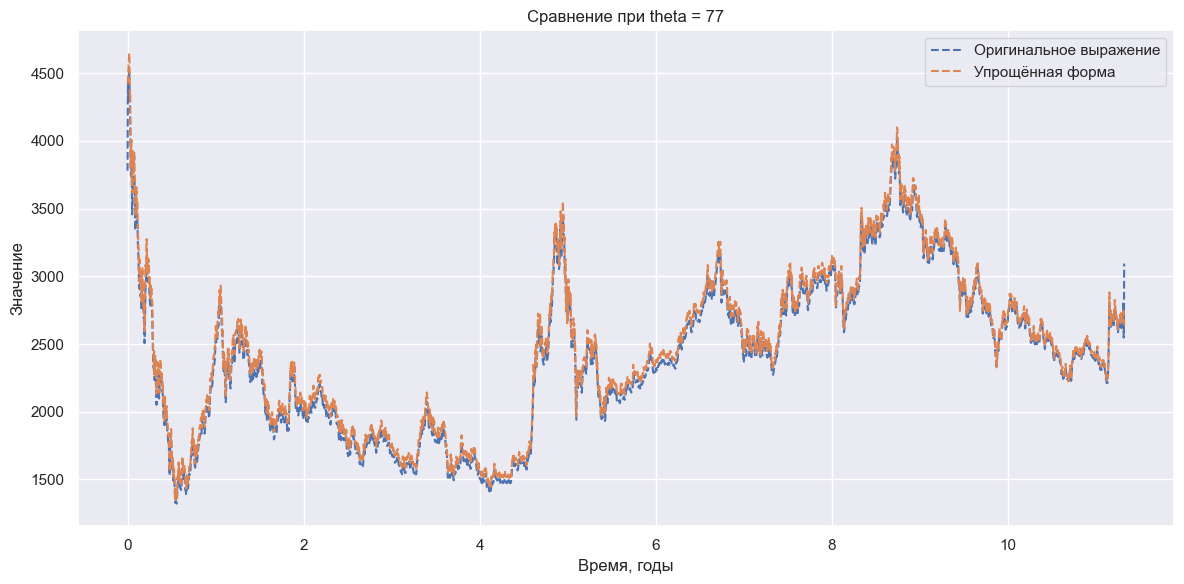

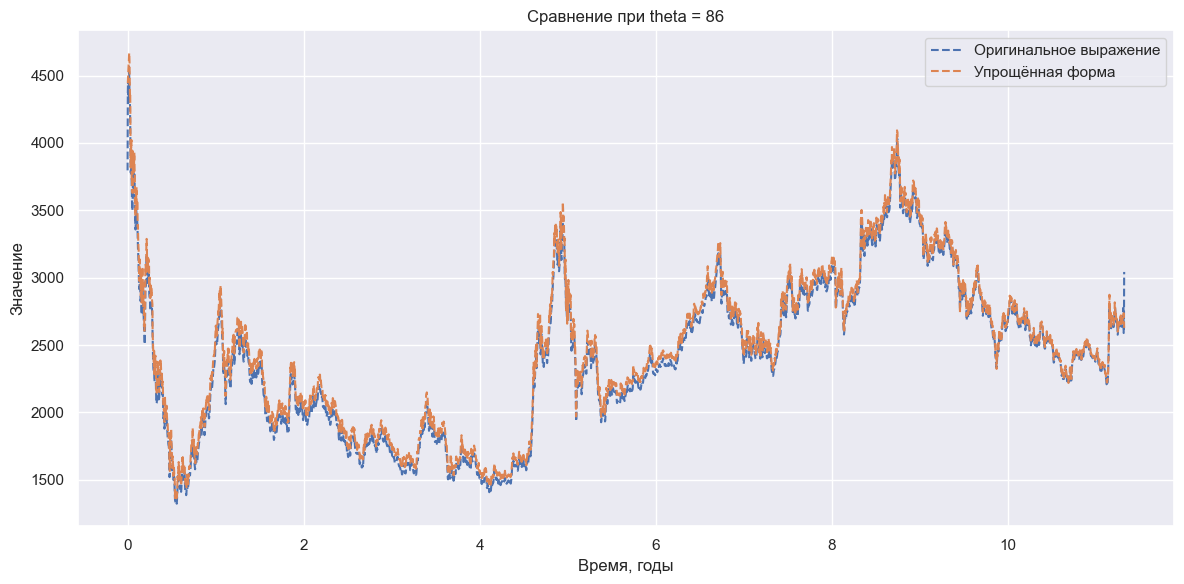

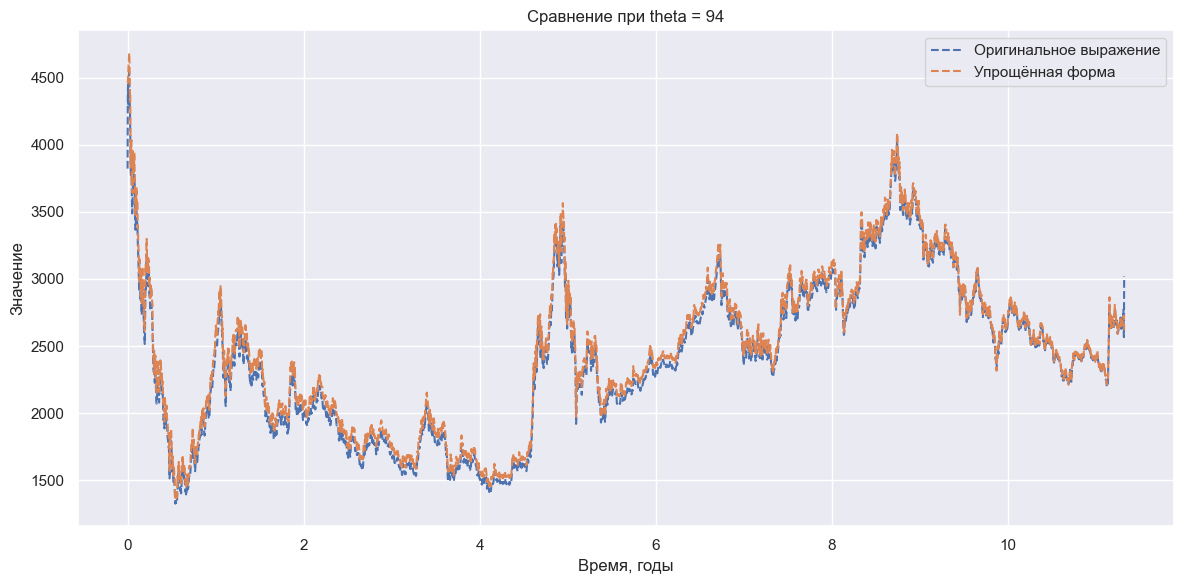

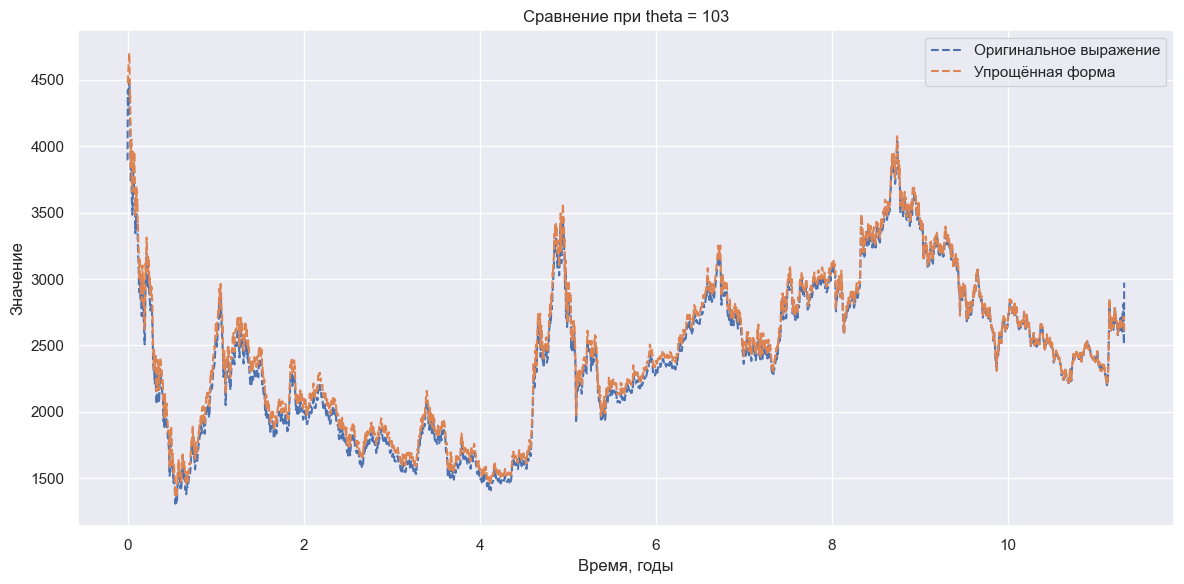

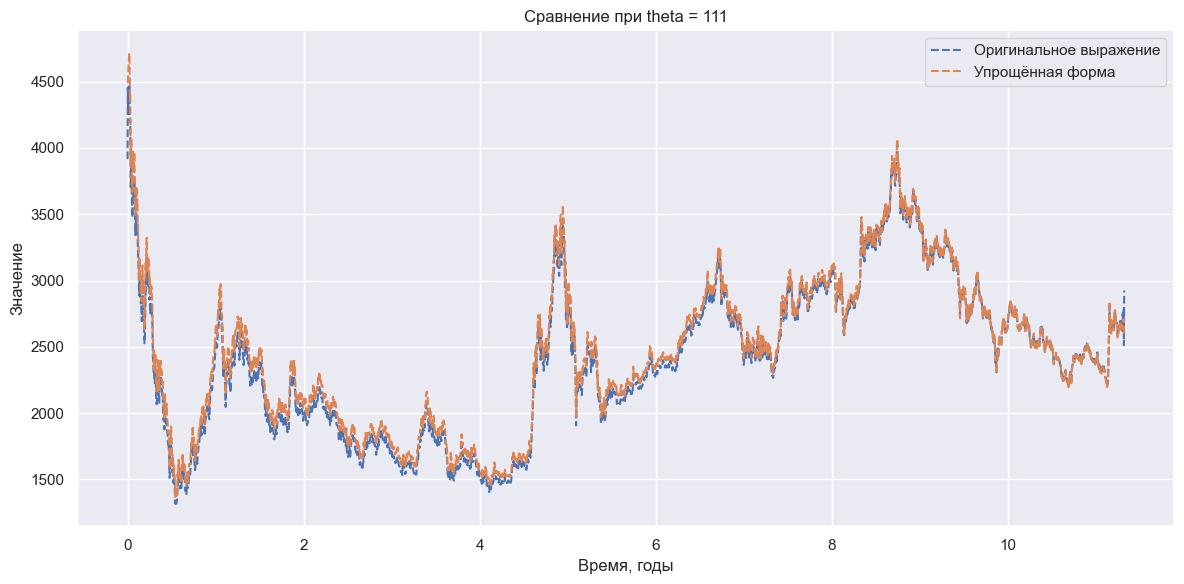

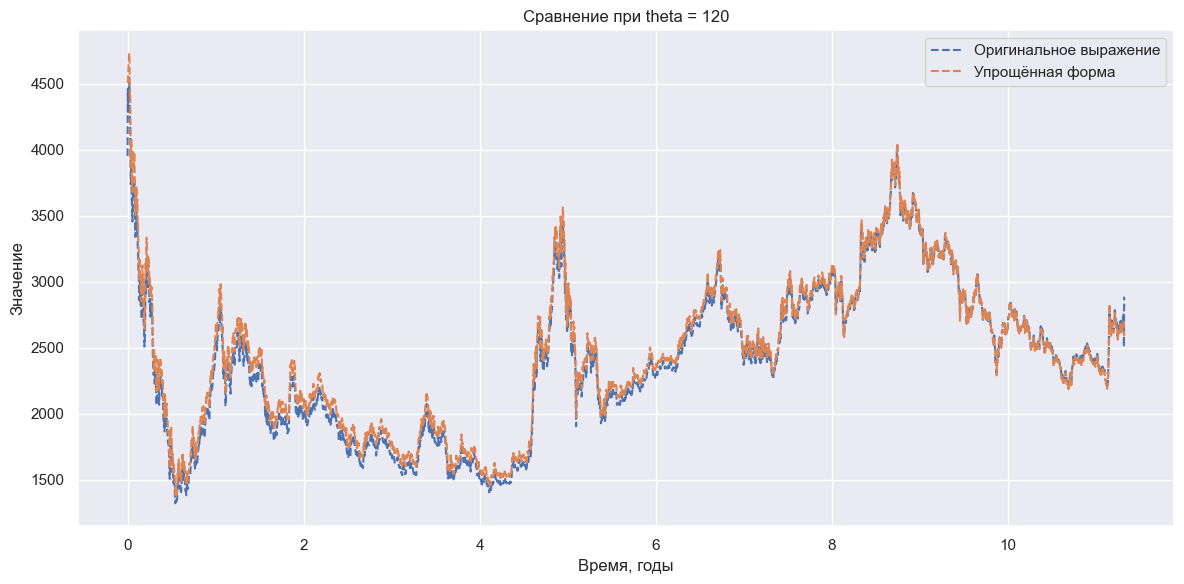

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import rfft, irfft, rfftfreq

# Предполагается, что data_ruo уже загружен и содержит колонку 'ruo'
# Например: import pandas as pd; data_ruo = pd.read_csv("data.csv")

# 1. Временной сигнал
f_t = data_sse50['Price'].values[:-1]
t = np.arange(0, len(f_t)/365, 1/365)

# 2. Функция обратного Фурье с обнулением частот выше theta
def Inv_F(theta):
    yf = rfft(f_t)
    xf = rfftfreq(len(f_t), 1/365)
    yf[xf > theta] = 0
    return irfft(yf)

# 3. Упрощённая формула с h(t)
def Inv_F_2(theta):
    dirac = np.zeros_like(t)
    dirac[0] = 100000  # приближение дельта-функции
    h_t = np.exp(1j * theta / 365 * t) / (2 * np.pi * 1j * t) + dirac
    manual_result = f_t + f_t * h_t
    return manual_result

# 4. Список theta для построения
thetas = np.linspace(2, 120, 15, dtype=int)  # 10 значений от 5 до 50

# 5. Построение 10 отдельных графиков
for theta in thetas:
    plt.figure(figsize=(12, 6))
    plt.plot(t, Inv_F(theta), '--', label='Оригинальное выражение')
    plt.plot(t, np.real(Inv_F_2(theta)), '--', label='Упрощённая форма')
    plt.title(f'Сравнение при theta = {theta}')
    plt.xlabel('Время, годы')
    plt.ylabel('Значение')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()